# HW2 - Introduction to Data Processing Using Pandas and

## Erru Torculas

***

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# %matplotlib inline

In [7]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

                          gross director_name
                            sum         count
director_name                                
0                  1.039304e+06           104
Steven Spielberg   4.114233e+09            26
Woody Allen        3.083454e+08            22
Clint Eastwood     1.378321e+09            20
Martin Scorsese    9.202871e+08            20
Ridley Scott       1.337772e+09            17
Steven Soderbergh  1.050730e+09            16
Spike Lee          3.285004e+08            16
Tim Burton         2.071275e+09            16
Renny Harlin       5.239759e+08            15


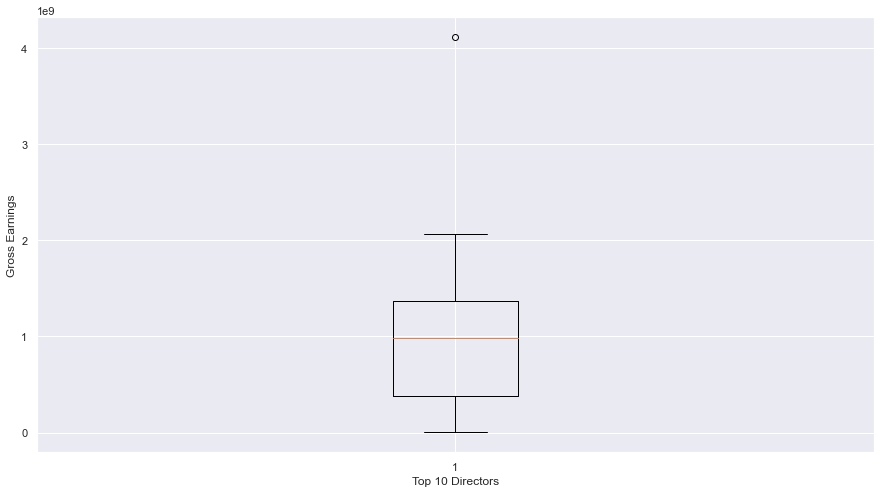

In [36]:
top10DirectorsData = data.groupby(['director_name']) \
                          .aggregate({'gross': sum, 'director_name': ['count']}) \
                          .sort_values([('director_name', 'count')], ascending=False) \
                          .head(10) \

top10DirectorsGross = top10DirectorsData[('gross', 'sum')]

print(top10DirectorsData)

fig = plt.figure(figsize=(15,8))
plt.xlabel('Top 10 Directors')         #x label
plt.ylabel('Gross Earnings')           #y label
plt.boxplot(top10DirectorsGross)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

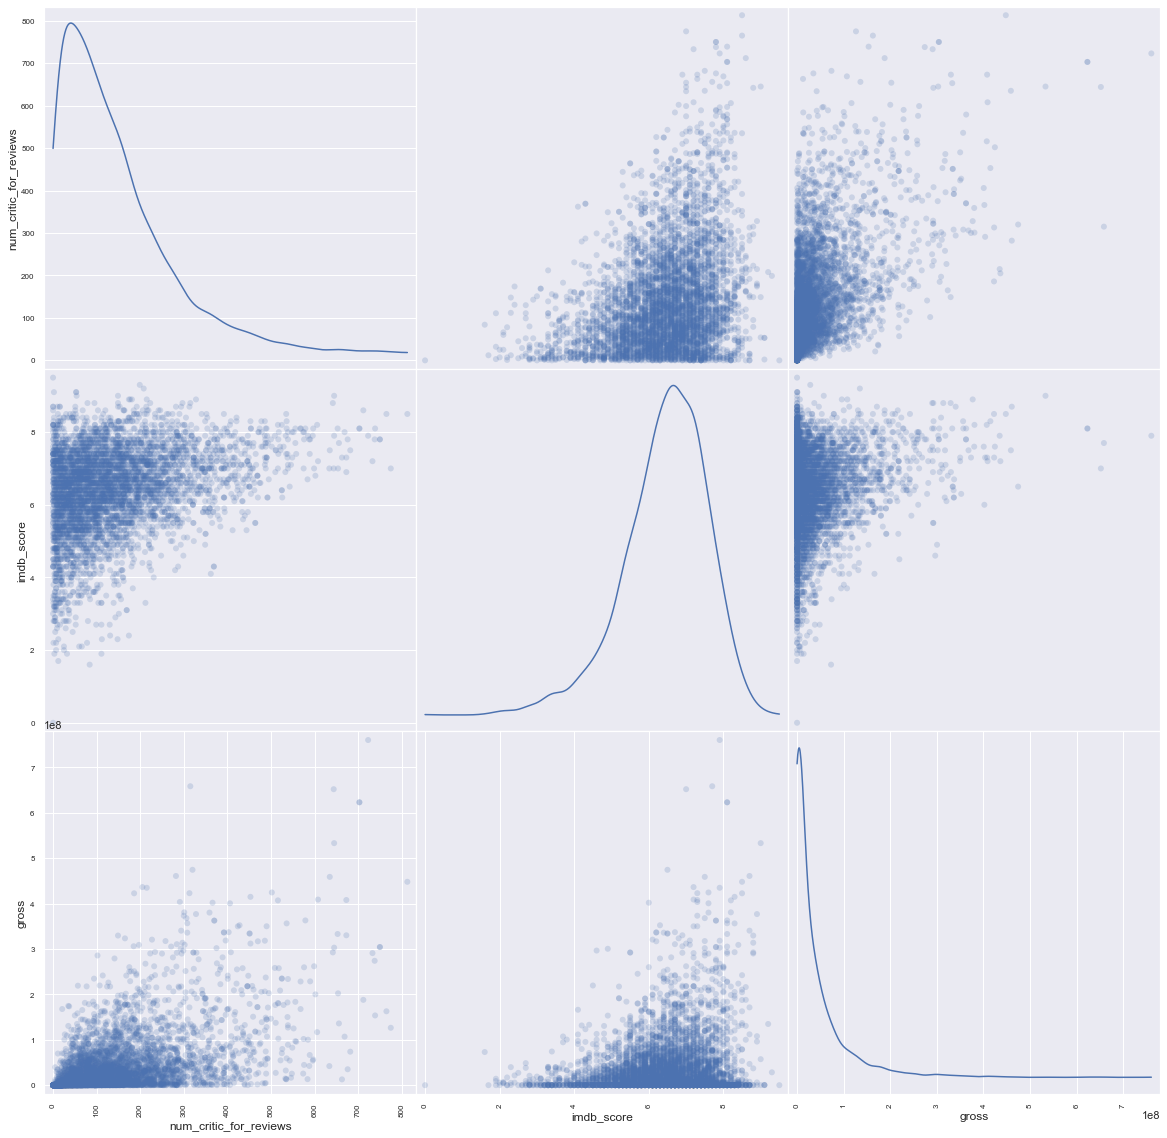

In [57]:
from pandas.plotting import scatter_matrix

cols = ["num_critic_for_reviews", "imdb_score", "gross"]
scatter_matrix(data[cols], alpha=0.2, figsize=(20, 20), 
               diagonal='kde', marker='o')
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [35]:
data['sales'] = data['gross'] - data['budget']
data['sales']

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64

## Which directors garnered the most total sales?

In [18]:
# Since directors is plural, I just ranked the top 5 most total sales

totalSales = data.groupby('director_name')['sales'] \
                 .sum() \
                 .sort_values(ascending=False) \
                 .head(5)

totalSales
# Steven Spielberg garnered the most total sales among the directors

director_name
Steven Spielberg    2.451332e+09
George Lucas        1.386641e+09
James Cameron       1.199626e+09
Joss Whedon         1.000887e+09
Chris Columbus      9.417076e+08
Name: sales, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

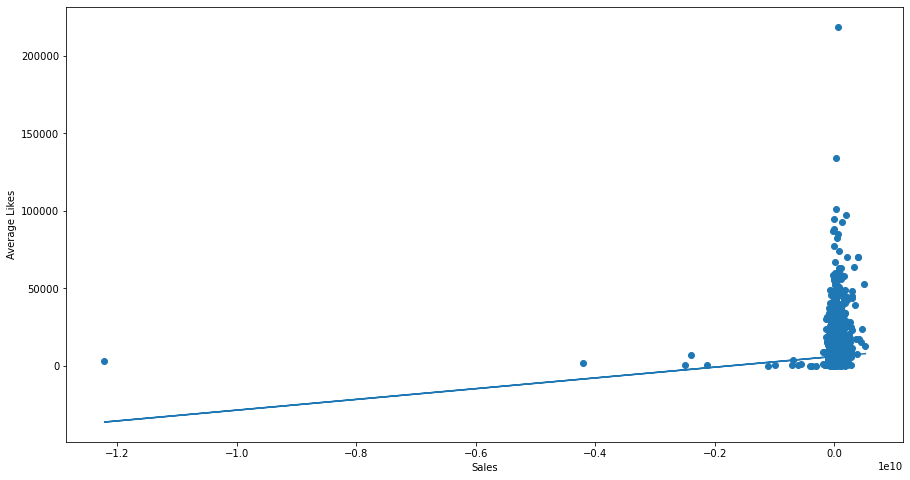

In [19]:
# Different kind of likes: Didn't include the facebook likes of each actors
# since it will used in a separate problem. Just the general context of likes.

likesList = ['director_facebook_likes', 
             'cast_total_facebook_likes',
             'movie_facebook_likes']

# Average of Likes
data['average_likes'] = data[likesList].mean(axis=1)

fig = plt.figure(figsize=(15,8))
plt.xlabel('Sales')         #x label
plt.ylabel('Average Likes') #y label

a, b = np.polyfit(data['sales'], data['average_likes'], 1)  # finding/defining line

plt.scatter(data['sales'], data['average_likes'])

plt.plot(data['sales'], a*data['sales']+b) # fit with line
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

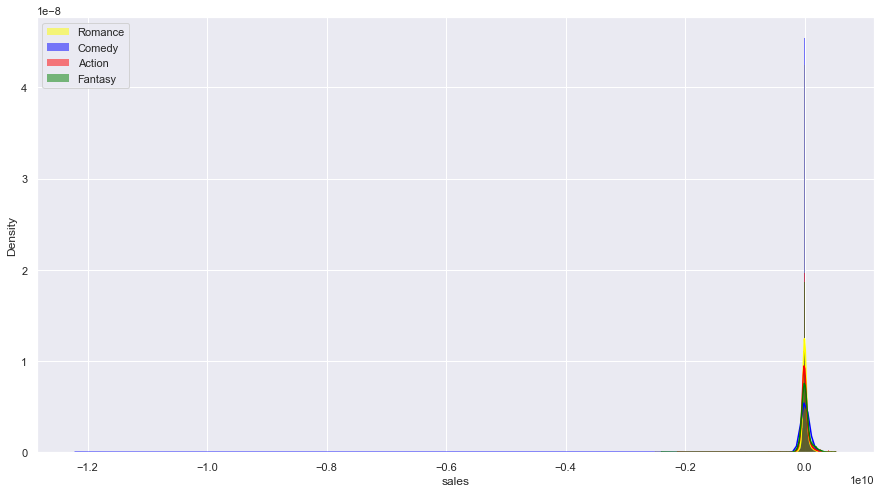

In [33]:
# Query for getting the sales of the specified genre
romance = data[data['genres'].str.contains('Romance')]['sales']#.sum()
comedy = data[data['genres'].str.contains('Comedy')]['sales']#.sum()
action = data[data['genres'].str.contains('Action')]['sales']#.sum()
fantasy = data[data['genres'].str.contains('Fantasy')]['sales']#.sum()

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.histplot(romance, color="yellow", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(comedy, color="blue", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(action, color="red", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(fantasy, color="green", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

# Based on the histogram, comedy is the most profitable among the genres.

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [48]:
actorsLikesList = ['actor_1_facebook_likes',
            'actor_2_facebook_likes',
            'actor_3_facebook_likes',]

data['average_actor_likes'] = data[actorsLikesList].mean(axis=1)

data['average_actor_likes']

0         930.333333
1       15333.333333
2        3851.333333
3       24333.333333
4          47.666667
            ...     
5039      584.333333
5040        0.000000
5041      718.000000
5042       41.666667
5043        0.000000
Name: average_actor_likes, Length: 5044, dtype: float64

## Copying the whole dataframe

In [12]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,12611.333333,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,16304.333333,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,32233.333333,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,97586.333333,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,91.333333,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [34]:
#Normalize function

def normalizeColumn(column, col_name):
    max = column.max()
    min = column.min()
    df[col_name] = (column - min) / (max-min)
    
#df.dtypes

In [44]:
#num_critic_for_reviews      float64
normalizeColumn(df['num_critic_for_reviews'], col_name='nm_num_critic_for_reviews')

#duration                     float64
normalizeColumn(df['duration'], col_name='nm_duration')

#director_facebook_likes      float64
normalizeColumn(df['director_facebook_likes'], col_name='nm_director_facebook_likes')

#actor_3_facebook_likes       float64
normalizeColumn(df['actor_3_facebook_likes'], col_name='nm_actor_3_facebook_likes')

#actor_1_facebook_likes       float64
normalizeColumn(df['actor_1_facebook_likes'], col_name='nm_actor_1_facebook_likes')

#gross                        float64
normalizeColumn(df['gross'], col_name='nm_gross')

#num_voted_users              float64
normalizeColumn(df['num_voted_users'], col_name='nm_num_voted_users')

#cast_total_facebook_likes    float64
normalizeColumn(df['cast_total_facebook_likes'], col_name='nm_cast_total_facebook_likes')

#facenumber_in_poster         float64
normalizeColumn(df['facenumber_in_poster'], col_name='nm_facenumber_in_poster')

#num_user_for_reviews         float64
normalizeColumn(df['num_user_for_reviews'], col_name='nm_num_user_for_reviews')

#budget                       float64
normalizeColumn(df['budget'], col_name='nm_budget')

#title_year                   float64
normalizeColumn(df['title_year'], col_name='nm_title_year')

#actor_2_facebook_likes       float64
normalizeColumn(df['actor_2_facebook_likes'], col_name='nm_actor_2_facebook_likes')

#imdb_score                   float64
normalizeColumn(df['imdb_score'], col_name='nm_imdb_score')

#aspect_ratio                 float64
normalizeColumn(df['aspect_ratio'], col_name='nm_aspect_ratio')

#movie_facebook_likes         float64
normalizeColumn(df['movie_facebook_likes'], col_name='nm_movie_facebook_likes')

#sales                        float64
normalizeColumn(df['sales'], col_name='nm_sales')

#average_likes                float64
normalizeColumn(df['average_likes'], col_name='nm_average_likes')

#average_actor_likes          float64
normalizeColumn(df['average_actor_likes'], col_name='nm_average_actor_likes')

#Unnamed: 0                     int64
normalizeColumn(df['Unnamed: 0'], col_name='nm_Unnamed: 0')


In [45]:
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes,nm_sales,nm_average_likes,nm_average_actor_likes,nm_Unnamed: 0
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.057585,0.004261,0.000000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.074447,0.070229,0.000198
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.147181,0.017640,0.000397
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.445590,0.111450,0.000595
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000417,0.000218,0.000793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.051373,0.002676,0.999207
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000024,0.000000,0.999405
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.004636,0.003289,0.999603
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000966,0.000191,0.999802
